In [2]:
from keras.datasets import mnist

# Load the MNIST dataset
(X_train, y_train), (X_test, y_test) = mnist.load_data()




In [3]:
# Normalize the pixel values to be between 0 and 1
X_train = X_train.astype('float32') / 255
X_test = X_test.astype('float32') / 255

# Reshape the input data to have a single channel (since MNIST is grayscale)
X_train = X_train.reshape(X_train.shape[0], 28, 28, 1)
X_test = X_test.reshape(X_test.shape[0], 28, 28, 1)


In [4]:
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense

model = Sequential()
model.add(Conv2D(32, kernel_size=(3, 3), activation='relu', input_shape=(28, 28, 1)))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Conv2D(64, kernel_size=(3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dense(10, activation='softmax'))

model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])


In [5]:
history = model.fit(X_train, y_train, epochs=10, batch_size=128, validation_data=(X_test, y_test))


Epoch 1/10
469/469 [==============================] - 45s 93ms/step - loss: 0.2040 - accuracy: 0.9406 - val_loss: 0.0639 - val_accuracy: 0.9797
Epoch 2/10
469/469 [==============================] - 44s 94ms/step - loss: 0.0559 - accuracy: 0.9830 - val_loss: 0.0404 - val_accuracy: 0.9877
Epoch 3/10
469/469 [==============================] - 42s 90ms/step - loss: 0.0387 - accuracy: 0.9878 - val_loss: 0.0376 - val_accuracy: 0.9866
Epoch 4/10
469/469 [==============================] - 41s 88ms/step - loss: 0.0289 - accuracy: 0.9910 - val_loss: 0.0341 - val_accuracy: 0.9889
Epoch 5/10
469/469 [==============================] - 43s 91ms/step - loss: 0.0223 - accuracy: 0.9931 - val_loss: 0.0311 - val_accuracy: 0.9901
Epoch 6/10
469/469 [==============================] - 42s 89ms/step - loss: 0.0190 - accuracy: 0.9940 - val_loss: 0.0266 - val_accuracy: 0.9918
Epoch 7/10
469/469 [==============================] - 43s 92ms/step - loss: 0.0139 - accuracy: 0.9955 - val_loss: 0.0290 - val_accuracy:

In [6]:
test_loss, test_acc = model.evaluate(X_test, y_test)
print('Test accuracy:', test_acc)

313/313 [==============================] - 5s 14ms/step - loss: 0.0319 - accuracy: 0.9901
Test accuracy: 0.9901000261306763


In [9]:
!pip install tensorflow

In [14]:
from sklearn.model_selection import GridSearchCV
from tensorflow.keras.wrappers.scikit_learn import KerasClassifier

def create_model(optimizer='adam'):
    # Define the model architecture
    model = Sequential()
    model.add(Conv2D(32, kernel_size=(3, 3), activation='relu', input_shape=(28, 28, 1)))
    model.add(MaxPooling2D(pool_size=(2, 2)))
    model.add(Conv2D(64, kernel_size=(3, 3), activation='relu'))
    model.add(MaxPooling2D(pool_size=(2, 2)))
    model.add(Flatten())
    model.add(Dense(128, activation='relu'))
    model.add(Dense(10, activation='softmax'))
    # Compile the model
    model.compile(optimizer=optimizer, loss='sparse_categorical_crossentropy', metrics=['accuracy'])
    return model

model = KerasClassifier(build_fn=create_model, verbose=0)

param_grid = {'batch_size': [64, 128],
              'epochs': [10, 20],
              'optimizer': ['adam', 'rmsprop']}

grid = GridSearchCV(estimator=model, param_grid=param_grid, n_jobs=-1)
grid_result = grid.fit(X_train, y_train)

print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))


NameError: name 'KerasClassifier' is not defined

In [16]:
from keras.callbacks import ReduceLROnPlateau

reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.2, patience=3, min_lr=0.0001)
history = model.fit(X_train, y_train, epochs=10, batch_size=128, validation_data=(X_test, y_test), callbacks=[reduce_lr])


Epoch 1/10
469/469 [==============================] - 42s 88ms/step - loss: 0.0070 - accuracy: 0.9978 - val_loss: 0.0425 - val_accuracy: 0.9890 - lr: 0.0010
Epoch 2/10
469/469 [==============================] - 41s 87ms/step - loss: 0.0067 - accuracy: 0.9977 - val_loss: 0.0318 - val_accuracy: 0.9918 - lr: 0.0010
Epoch 3/10
469/469 [==============================] - 43s 92ms/step - loss: 0.0058 - accuracy: 0.9979 - val_loss: 0.0311 - val_accuracy: 0.9927 - lr: 0.0010
Epoch 4/10
469/469 [==============================] - 40s 85ms/step - loss: 0.0043 - accuracy: 0.9988 - val_loss: 0.0362 - val_accuracy: 0.9909 - lr: 0.0010
Epoch 5/10
469/469 [==============================] - 41s 87ms/step - loss: 0.0038 - accuracy: 0.9987 - val_loss: 0.0438 - val_accuracy: 0.9905 - lr: 0.0010
Epoch 6/10
469/469 [==============================] - 41s 87ms/step - loss: 0.0053 - accuracy: 0.9982 - val_loss: 0.0377 - val_accuracy: 0.9915 - lr: 0.0010
Epoch 7/10
469/469 [==============================] - 40s 

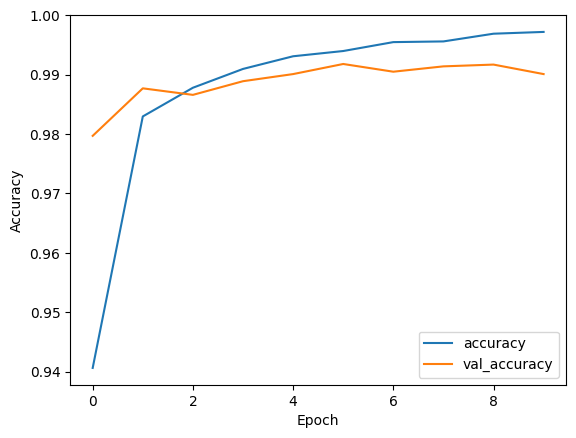

In [15]:
import matplotlib.pyplot as plt

plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label='val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(loc='lower right')
plt.show()
